In [1]:
!kaggle datasets download -d landlord/handwriting-recognition

Dataset URL: https://www.kaggle.com/datasets/landlord/handwriting-recognition
License(s): CC0-1.0
 98% 1.23G/1.26G [00:04<00:00, 305MB/s]
100% 1.26G/1.26G [00:04<00:00, 302MB/s]


In [ ]:
!unzip "/content/handwriting-recognition.zip" -d "/content/dataset"

In [46]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [4]:
train = pd.read_csv("/content/dataset/written_name_train_v2.csv")
valid = pd.read_csv("/content/dataset/written_name_validation_v2.csv")

In [5]:
display(train['IDENTITY'].isnull().sum())
display(valid['IDENTITY'].isnull().sum())

565

78

In [6]:
train.dropna(axis=0, inplace=True)
valid.dropna(axis=0, inplace=True)

In [7]:
train = train[train['IDENTITY']!='UNREADABLE']
valid = valid[valid['IDENTITY']!='UNREADABLE']

In [8]:
train.reset_index(inplace=True, drop=True)
valid.reset_index(inplace=True, drop=True)

In [9]:
train['IDENTITY'] = train['IDENTITY'].str.upper()
valid['IDENTITY'] = valid['IDENTITY'].str.upper()

<ipython-input-9-0a9d753a51e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['IDENTITY'] = train['IDENTITY'].str.upper()
<ipython-input-9-0a9d753a51e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['IDENTITY'] = valid['IDENTITY'].str.upper()


In [10]:
def preprocessing(img):
  (h, w) = img.shape
  final_img = np.ones((64,256))*255

  if w > 256:
        img = img[:, :256]

  if h > 64:
        img = img[:64, :]


  final_img[:h, :w] = img
  return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

In [11]:
train_size = 100000
valid_size = 20000

In [12]:
train_x = []
for i in range(train_size):
  img_dir = "/content/dataset/train_v2/train/" + train.loc[i, 'FILENAME']
  image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
  image = preprocessing(image)
  image = image/255.
  train_x.append(image)

In [13]:
valid_x = []
for i in range(valid_size):
  img_dir = "/content/dataset/validation_v2/validation/" + valid.loc[i, 'FILENAME']
  image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
  image = preprocessing(image)
  image = image/255.
  valid_x.append(image)

In [14]:
train_x = np.array(train_x).reshape(-1, 256, 64, 1)
valid_x = np.array(valid_x).reshape(-1, 256, 64, 1)

In [15]:
train_x.shape

(100000, 256, 64, 1)

In [16]:
valid_x.shape

(20000, 256, 64, 1)

In [20]:
alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "
max_str_len = 100
num_of_char = len(alphabets) + 1
num_of_timestamps = 64

In [18]:
def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch))

    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=alphabets[ch]
    return ret

In [19]:
a = "KHONGMINHTRI"
b = label_to_num(a)
print(b)
print(num_to_label(b))

[10  7 14 13  6 12  8 13  7 19 17  8]
KHONGMINHTRI


In [21]:
train_y = np.ones([train_size, max_str_len]) * -1
train_label_len = np.zeros([train_size, 1])
train_input_len = np.ones([train_size, 1]) * (num_of_timestamps-2)
train_output = np.zeros([train_size])

for i in range(train_size):
    train_label_len[i] = len(train.loc[i, 'IDENTITY'])
    train_y[i, 0:len(train.loc[i, 'IDENTITY'])]= label_to_num(train.loc[i, 'IDENTITY'])

In [22]:
valid_y = np.ones([valid_size, max_str_len]) * -1
valid_label_len = np.zeros([valid_size, 1])
valid_input_len = np.ones([valid_size, 1]) * (num_of_timestamps-2)
valid_output = np.zeros([valid_size])

for i in range(valid_size):
    valid_label_len[i] = len(valid.loc[i, 'IDENTITY'])
    valid_y[i, 0:len(valid.loc[i, 'IDENTITY'])]= label_to_num(valid.loc[i, 'IDENTITY'])

In [23]:
print('True label : ',train.loc[100, 'IDENTITY'] , '\ntrain_y : ',train_y[100],'\ntrain_label_len : ',train_label_len[100],
      '\ntrain_input_len : ', train_input_len[100])

True label :  NOUR 
train_y :  [13. 14. 20. 17. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] 
train_label_len :  [4.] 
train_input_len :  [62.]


In [24]:
input_data = tf.keras.layers.Input(shape=(256, 64, 1), name='input')

x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='max1')(x)

x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='max2')(x)
x = tf.keras.layers.Dropout(0.3)(x)


# CNN to RNN
x = tf.keras.layers.Reshape(target_shape=((64, 1024)), name='reshape')(x)
x = tf.keras.layers.Dense(1024, activation='relu', kernel_initializer='he_normal', name='dense1')(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal', name='dense2')(x)

## RNN
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True), name = 'lstm1')(x)

## OUTPUT
x = tf.keras.layers.Dense(num_of_char, kernel_initializer='he_normal',name='dense3')(x)
y_pred = tf.keras.layers.Activation('softmax', name='softmax')(x)

model = tf.keras.models.Model(inputs=input_data, outputs=y_pred)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 256, 64, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 256, 64, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 64, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256, 64, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max1 (MaxPooling2D)                  │ (None, 128, 32, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 128, 32, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 32, 64)         │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128, 32, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max2 (MaxPooling2D)                  │ (None, 64, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 64, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1 (Dense)                       │ (None, 64, 1024)            │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 64, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm1 (Bidirectional)                │ (None, 64, 512)             │         788,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense3 (Dense)                       │ (None, 64, 30)              │          15,390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Activation)                 │ (None, 64, 30)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,003,870 (7.64 MB)

 Trainable params: 2,003,678 (7.64 MB)

 Non-trainable params: 192 (768.00 B)

In [38]:
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage
    y_pred = y_pred[:, 2:, :]
    return tf.keras.backend.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [39]:
labels = tf.keras.layers.Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
input_length = tf.keras.layers.Input(name='input_length', shape=[1], dtype='int64')
label_length = tf.keras.layers.Input(name='label_length', shape=[1], dtype='int64')

ctc_loss = tf.keras.layers.Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
model_final = tf.keras.models.Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)

In [41]:
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001))

history = model_final.fit(x=[train_x, train_y, train_input_len, train_label_len], y=train_output,
                validation_data=([valid_x, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=50, batch_size=120)

model.save('handwriting_model.h5')

Epoch 1/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 69s 79ms/step - loss: 5.9170 - val_loss: 4.7613
Epoch 2/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - loss: 4.1666 - val_loss: 3.9502
Epoch 3/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - loss: 3.3925 - val_loss: 2.9558
Epoch 4/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - loss: 2.9372 - val_loss: 2.6323
Epoch 5/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - loss: 2.6670 - val_loss: 2.4495
Epoch 6/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - loss: 2.4577 - val_loss: 2.2005
Epoch 7/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - loss: 2.3397 - val_loss: 2.1232
Epoch 8/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - loss: 2.1581 - val_loss: 2.0084
Epoch 9/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 64s 77ms/step - loss: 2.0490 - val_loss: 1.9673
Epoch 10/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - loss: 1.9822 - val_loss: 1.8958
Epoch 11/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 64s 77ms/step - loss: 1.8914 - val_loss: 1.8434
Epoch 12/50
834/834 ━━━━━━━━━━

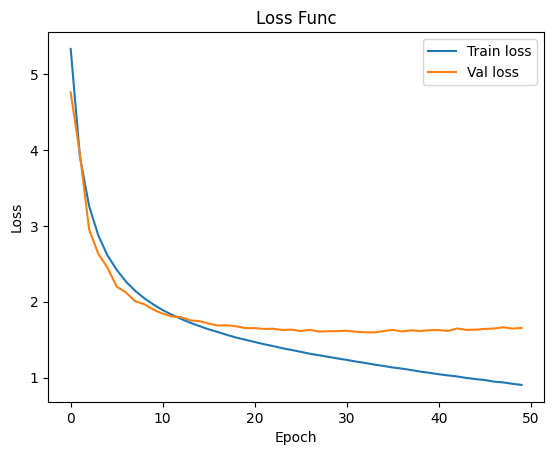

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Func")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train loss", "Val loss"])
plt.show()

In [45]:
preds = model.predict(valid_x)
decoded = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1],
                                   greedy=True)[0][0])

prediction = []
for i in range(valid_size):
    prediction.append(num_to_label(decoded[i]))

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [47]:
y_true = valid.loc[0:valid_size, 'IDENTITY']
correct_char = 0
total_char = 0
correct = 0

for i in range(valid_size):
    pr = prediction[i]
    tr = y_true[i]
    total_char += len(tr)

    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1

    if pr == tr :
        correct += 1

print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))
print('Correct words predicted      : %.2f%%' %(correct*100/valid_size))

Correct characters predicted : 93.44%
Correct words predicted      : 81.03%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


(-0.5, 219.5, 83.5, -0.5)

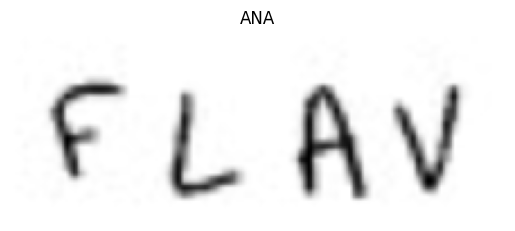

In [60]:
test = pd.read_csv('./dataset/written_name_test_v2.csv')

test_img = "/content/3.png"#'./dataset/test_v2/test/'+test.loc[4000, 'FILENAME']
test_img = cv2.imread(test_img, cv2.IMREAD_GRAYSCALE)
plt.imshow(test_img, cmap='gray')
test_img = preprocessing(test_img)
test_img = test_img/255.

pred = model.predict(test_img.reshape(1, 256, 64, 1))
decoded = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1],
                                       greedy=True)[0][0])
plt.title(num_to_label(decoded[0]), fontsize=12)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


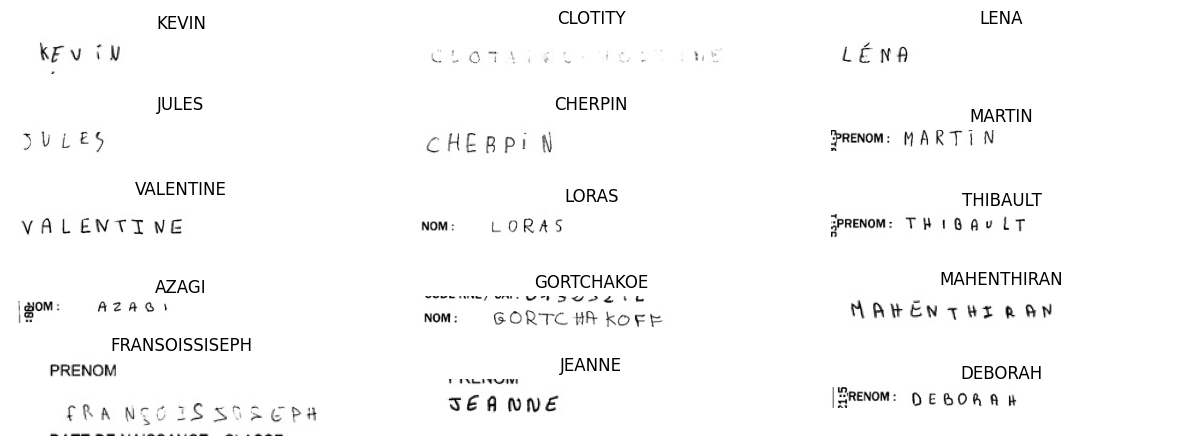

In [50]:
test = pd.read_csv('./dataset/written_name_test_v2.csv')

plt.figure(figsize=(15, 10))
for i in range(15):
    ax = plt.subplot(5, 3, i+1)
    img_dir = './dataset/test_v2/test/'+test.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')

    image = preprocessing(image)
    image = image/255.
    pred = model.predict(image.reshape(1, 256, 64, 1))
    decoded = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1],
                                       greedy=True)[0][0])
    plt.title(num_to_label(decoded[0]), fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)